# A genetic algorithm for optimizing traveling salesman problem (harder case)

https://github.com/luthfishahab/geneticalgorithm

https://www.theprojectspot.com/tutorial-post/applying-a-genetic-algorithm-to-the-travelling-salesman-problem/5

![TSP.JPG](attachment:f458e77a-28f8-4e10-9f68-287ba0f3ab9f.JPG)

![Exchange.png](attachment:cc1a9c7f-a99d-4c98-9cd1-029e6afc1f0b.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
x = np.array([0, 30, 35, 40, 45, 50, 65, 70, 75, 80])
y = np.array([0,  0,  0,  0, 30, 35, 40, 65, 75, 90])

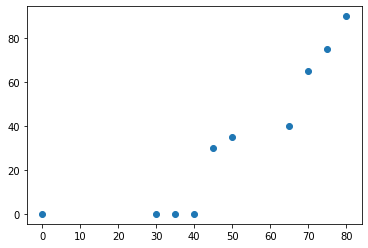

In [16]:
plt.scatter(x, y)
plt.show()

In [17]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 100

# maximum generation
N = 200

In [28]:
# distance matrix
d = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(m)])

In [18]:
def createPopulation():
    pop = np.zeros((n, m), dtype=int)
    
    for i in range(n):
        pop[i] = np.random.permutation(m)
    
    pop = pd.DataFrame(pop)
    
    return pop

In [19]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    
    for k in range(n):
        a = pop.loc[k]

        b = 0
        for i in range(0, m-1):
            b += d[a[i], a[i+1]]
        b += d[a[m-1], a[0]]

        fitness[k] = b
    
    pop['fitness'] = fitness
    
    return pop

In [20]:
def randomSelection(m):
    position = np.random.permutation(m)
    
    return position[0], position[1]

In [21]:
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection(m)
        idx1 = min(a,b)
        idx2 = max(a,b)

        temp = list(pop.loc[a][idx1:idx2+1])
        temp += [val for val in pop.loc[b] if val not in temp]
        
        popc.loc[i] = temp
    
    return popc

In [22]:
def mutation(pop):
    popm = pop.copy()
    
    for i in range(n):
        a, b = randomSelection(m)
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

In [23]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popm)
    popAll = popAll.append(popm)

    popAll = popAll.drop_duplicates()

    popAll.index = range(len(popAll))

    return popAll

In [24]:
def sort(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    
    popAll.index = range(len(popAll))

    return popAll

In [25]:
def elimination(popAll):
    pop = popAll.head(n)
    
    return pop

In [26]:
def plotSolution(pop):
    solution = pop.loc[0]
    solution = solution.to_numpy()

    a = np.zeros(m+1, dtype=int)
    b = np.zeros(m+1, dtype=int)

    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]

    a[m] = a[0]
    b[m] = b[0]

    plt.plot(a[:-1], b[:-1], marker = 'o')
    plt.plot(a[-2:], b[-2:],"b--", marker = 'o')
    plt.scatter(a[0],b[0],s=200,c="b")
    plt.show()

Solusi pada populasi awal
   0  1  2  3  4  5  6  7  8  9  fitness
0  4  3  5  2  0  6  1  9  8  7      442


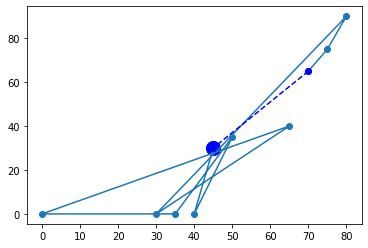


Solusi terbaik pada populasi akhir
   0  1  2  3  4  5  6  7  8  9  fitness
0  1  2  3  6  7  8  9  5  4  0      263


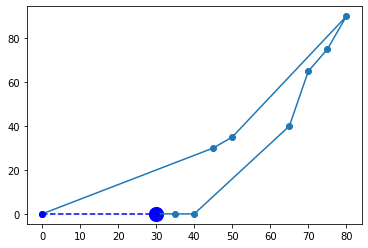

In [29]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)

    popAll = sort(popAll)

    pop = elimination(popAll)
    
print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)